<a href="https://colab.research.google.com/github/janghyukjin/MachineLearning/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()
size_row    = 28    # height of the image
size_col    = 28    # width of the image
num_image   = len(data)
count       = 0     # count for the number of images
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)
#
# example of distance function between two vectors x and y
#
def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
list_images = np.empty((size_row * size_col, 1000), dtype=float) 
list_labels = np.empty((10, 1000), dtype=float)
list_images2 = np.empty((size_row * size_col, 9000), dtype=float) 
list_labels2 = np.empty((10, 9000), dtype=float)
cnt = 0
for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector
    if count<1000:
      list_images[:, count] = im_vector
    else:
      list_images2[:, cnt] = im_vector
      cnt += 1

    count += 1

def sigmoid(z):
  return 1/(1+np.exp(-z))


In [0]:
u=np.random.randn(196,784) 
v=np.random.randn(49,196) 
w=np.random.randn(10,49) 
m = 1000
test_m = 9000
cost = 0
test_cost = 0
accuracy = 0
test_accuracy = 0
cost_list = np.empty(0)
accuracy_list = np.empty(0)
test_cost_list = np.empty(0)
test_accuracy_list = np.empty(0)
bias1 = np.zeros((196, 1))
bias2 = np.zeros((49, 1)) 
bias3 = np.zeros((10, 1))
lamda = 0.5
one_hot_encoding = np.transpose(np.eye(10)[list_label])
cnt = 0
for i in range(10000): 
  if i<1000:
    list_labels[:, i] = one_hot_encoding[:, i]
  else:
    list_labels2[:, cnt] = one_hot_encoding[:, i] 
    cnt += 1

In [0]:
alpha = 2
count = 0 
final_cnt = 0
jx = np.empty(0)
while(count<10000):
  if count%10==0:
    print(count)
  jx = np.append(jx, count)
  count += 1
  
  #propagation
  bias_y = np.dot(u, list_images)
  bias_y += bias1 
  sig_y = sigmoid(bias_y)
  bias_z = np.dot(v, sig_y)
  bias_z += bias2 
  sig_z = sigmoid(bias_z)
  bias_h = np.dot(w, sig_z)
  bias_h += bias3
  sig_h = sigmoid(bias_h)
  
  #objective Function
  cost = (-1/1000)*np.sum(list_labels*np.log(sig_h) + (1-list_labels)*np.log(1-sig_h)) + (lamda/(2*1000))*(np.sum(np.square(u)) + np.sum(np.square(v)) + np.sum(np.square(w)))
  cost_list = np.append(cost_list,cost)
  
  #Calculate Accuracy
  accuracy = 0
  for i in range(1000):
    if list_labels[:,i].argmax() == sig_h.argmax(axis=0)[i]:
      accuracy += 1
  accuracy/=1000
  accuracy*=100 
  accuracy_list = np.append(accuracy_list, accuracy)

  #back propagation
  delta_h = (sig_h-list_labels)
  delta_z = np.dot(np.transpose(w),delta_h)*sig_z*(1-sig_z)
  delta_y = np.dot(np.transpose(v),delta_z)*sig_y*(1-sig_y)

  delta_bias3 = np.sum(delta_h, axis=1, keepdims=True)/1000
  delta_bias2 = np.sum(delta_z, axis=1, keepdims=True)/1000
  delta_bias1 = np.sum(delta_y, axis=1, keepdims=True)/1000

  delta_w = np.dot(delta_h,np.transpose(sig_z))
  delta_v = np.dot(delta_z,np.transpose(sig_y))
  delta_u = np.dot(delta_y,np.transpose(list_images))
  delta_w/=1000
  delta_v/=1000
  delta_u/=1000
  delta_w += (lamda/1000)*w
  delta_v += (lamda/1000)*v
  delta_u += (lamda/1000)*u

  #update theta, bias
  u -= alpha * delta_u 
  v -= alpha * delta_v 
  w -= alpha * delta_w 
  bias1 -= alpha * delta_bias1 
  bias2 -= alpha * delta_bias2 
  bias3 -= alpha * delta_bias3

  #test images propagation
  test_bias_y = np.dot(u, list_images2)
  test_bias_y += bias1 
  test_sig_y = sigmoid(test_bias_y)
  test_bias_z = np.dot(v, test_sig_y)
  test_bias_z += bias2 
  test_sig_z = sigmoid(test_bias_z)
  test_bias_h = np.dot(w, test_sig_z)
  test_bias_h += bias3
  test_sig_h = sigmoid(test_bias_h)
  #test images objective function
  test_cost = (-1/9000)*np.sum(list_labels2*np.log(test_sig_h) + (1-list_labels2)*np.log(1-test_sig_h)) + (lamda/(2*9000))*(np.sum(np.square(u)) + np.sum(np.square(v)) + np.sum(np.square(w)))
  test_cost_list = np.append(test_cost_list,test_cost)
  #test images accuracy
  test_accuracy = 0
  for i in range(9000):
    if list_labels2[:,i].argmax() == test_sig_h.argmax(axis=0)[i]:
      test_accuracy += 1
  test_accuracy/=9000
  test_accuracy*=100 
  print(test_accuracy)
  test_accuracy_list = np.append(test_accuracy_list, test_accuracy)
  #change running rate for improving accuracy
  if test_accuracy > 80: 
    alpha = 0.8
  if test_accuracy > 88.5: 
    alpha = 0.5
  if test_accuracy > 89: 
    final_cnt += 1
  if final_cnt > 50:
    break
  if final_cnt>5:
    if test_accuracy<89:
      break

In [0]:
#classified testing images
correct_images = []
correct_label = []
incorrect_images = []
incorrect_label = []
correct_cnt = 0
incorrect_cnt = 0
for s in range(1):
    test_bias_y = np.dot(u, list_images2)
    test_bias_y += bias1 
    test_sig_y = sigmoid(test_bias_y)
    test_bias_z = np.dot(v, test_sig_y)
    test_bias_z += bias2 
    test_sig_z = sigmoid(test_bias_z)
    test_bias_h = np.dot(w, test_sig_z)
    test_bias_h += bias3
    test_sig_h = sigmoid(test_bias_h)
    
    for i in range(9000):
      if list_labels2[:,i].argmax() == test_sig_h.argmax(axis=0)[i]:
          if correct_cnt<10:
              correct_cnt += 1
              correct_label.append(list_labels2[:,i].argmax())
              correct_images.append(list_images2[:,i])
      else:    
          if incorrect_cnt < 10:
              incorrect_cnt += 1
              incorrect_label.append(test_sig_h.argmax(axis=0)[i])
              incorrect_images.append(list_images2[:,i])


# **Plot the loss curve**

Text(0.5, 1.0, 'Loss')

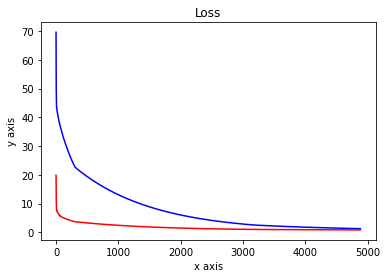

In [25]:
#display Training Error
plt.plot(jx,cost_list,'b-', label='Training')
#display Testing Error
plt.plot(jx,test_cost_list,'r-', label='Testing')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Loss')

# **Plot the accuracy curve**

Text(0.5, 1.0, 'Accuracy')

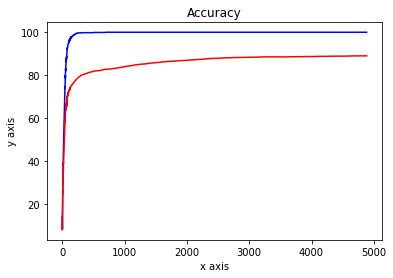

In [26]:
#display Training accuracy
plt.plot(jx,accuracy_list,'b-',label='Training_accuracy')
#display Testing accuracy
plt.plot(jx,test_accuracy_list,'r-',label='Testing_accuracy')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Accuracy')

# **Plot the accuracy value**

In [28]:
#final training accuracy
print('final training accuracy : ', accuracy_list[-1],'%')
#final testing accuracy
print('final testing accuracy : ',test_accuracy_list[-1],'%')

final training accuracy :  100.0 %
final testing accuracy :  89.03333333333333 %


# **Plot the classification example**

**Present 10 correctly testing images**

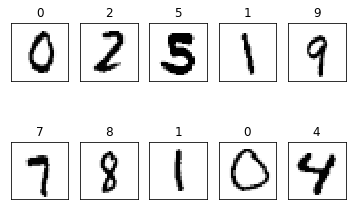

In [29]:
#present 10 correctly classified testing images
for i in range(10):

    label       = correct_label[i]
    im_vector   = correct_images[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

**Present 10 misclassified testing images**

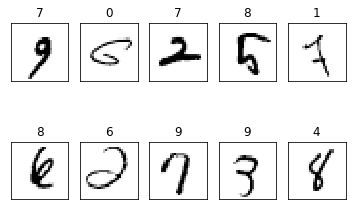

In [30]:
#present 10 misclassified testing images
for i in range(10):

    label       = incorrect_label[i]
    im_vector   = incorrect_images[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)